In [1]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow import random
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

In [2]:
train_path = '/content/drive/My Drive/all_dataset/cotton_diseases_data/train'

In [3]:
test_path = '/content/drive/My Drive/all_dataset/cotton_diseases_data/test'

In [4]:
vgg_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 6s 0us/step


In [5]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
last_layer = str(vgg_model.layers[-1])

np.random.seed(42)
random.set_seed(42)
classifier= Sequential()
for layer in vgg_model.layers:
    if str(layer) != last_layer:
        classifier.add(layer)

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [8]:
for layer in classifier.layers:
    layer.trainable=False

In [9]:
classifier.add(Dense(4, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [10]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip = True)

generate_test_data = ImageDataGenerator(rescale =1./255)

In [14]:
generate_val_data = ImageDataGenerator(rescale =1./255)

In [12]:
training_dataset = generate_train_data.flow_from_directory('/content/drive/My Drive/all_dataset/cotton_diseases_data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_datasetset = generate_test_data.flow_from_directory('/content/drive/My Drive/all_dataset/cotton_diseases_data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [15]:
val_datasetset = generate_val_data.flow_from_directory('/content/drive/My Drive/all_dataset/cotton_diseases_data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
# early_stopping = keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=10,
#     verbose=2
# )

In [13]:

history=classifier.fit(training_dataset,
                         steps_per_epoch = len(training_dataset),
                         epochs = 50,
                         validation_data = test_datasetset,
                         validation_steps = len(test_datasetset),
                       
                         shuffle=False)

Epoch 1/50
61/61 [==============================] - 1109s 18s/step - loss: 1.0456 - accuracy: 0.5474 - val_loss: 0.8941 - val_accuracy: 0.6667
Epoch 2/50
61/61 [==============================] - 37s 604ms/step - loss: 0.6746 - accuracy: 0.7483 - val_loss: 0.6116 - val_accuracy: 0.7222
Epoch 3/50
61/61 [==============================] - 37s 604ms/step - loss: 0.5778 - accuracy: 0.7822 - val_loss: 0.4993 - val_accuracy: 0.6667
Epoch 4/50
61/61 [==============================] - 37s 602ms/step - loss: 0.5576 - accuracy: 0.7683 - val_loss: 0.4523 - val_accuracy: 0.8889
Epoch 5/50
61/61 [==============================] - 36s 595ms/step - loss: 0.4828 - accuracy: 0.8227 - val_loss: 0.3604 - val_accuracy: 0.8889
Epoch 6/50
61/61 [==============================] - 36s 590ms/step - loss: 0.4571 - accuracy: 0.8216 - val_loss: 0.3329 - val_accuracy: 0.8889
Epoch 7/50
61/61 [==============================] - 36s 594ms/step - loss: 0.4228 - accuracy: 0.8426 - val_loss: 0.3504 - val_accuracy: 0.8889

In [16]:
training_dataset.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

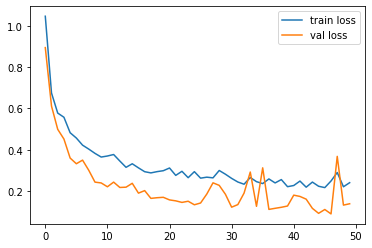

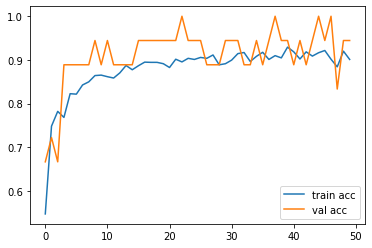

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model

classifier.save('Cotton_diseases_model_VGG16.h5')

In [111]:
eval = classifier.evaluate(test_datasetset)

1/1 [==============================] - 0s 2ms/step - loss: 0.1396 - accuracy: 0.9444


In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [21]:
model=load_model('Cotton_diseases_model_VGG16.h5')

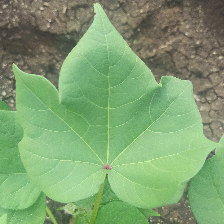

In [104]:
from keras.preprocessing import image
new_image = image.load_img('/content/drive/My Drive/all_dataset/cotton_diseases_data/test/fresh cotton leaf/d (341).jpg', target_size = (224, 224))
new_image

In [105]:
new_image = image.img_to_array(new_image)


In [106]:
# new_image=new_image.astype('float32')/255
# new_image = new_image / 255

In [107]:
new_image = np.expand_dims(new_image, axis = 0)
img_data=preprocess_input(new_image)
img_data.shape

(1, 224, 224, 3)

In [109]:
np.argmax(model.predict(img_data), axis=1)

array([2])

In [110]:

result=np.argmax(model.predict(img_data), axis=1)
if result == 0:
  prediction = 'diseased cotton leaf'
elif result == 1:
  prediction = 'diseased cotton plant'
elif result == 2:
  prediction = 'fresh cotton leaf'
elif result == 3:
  prediction = 'fresh cotton plant'


print(prediction)

fresh cotton leaf
